<a href="https://colab.research.google.com/github/daayvm/DiplomadoCD/blob/main/practica_1_velasco_martell_dayra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Módulo III - Práctica I - Velasco Martell Dayra

Bibliotecas Generales

In [2]:
# Install missing libraries
!pip install factor-analyzer
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=d2001af6f6d968df9cf53f4ae7ff17cc3ba93d81311f35f6f128e26569060e56
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor-analyzer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 8.0 MB/s eta 0:00:00


In [33]:
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Valores atipicos
from pyod.models.iforest import IForest

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (
    calculate_kmo,
    calculate_bartlett_sphericity
)

### Ejercicio 1

Se proporciona una tabla que contiene una serie de preguntas realizadas a los usuarios de una aerolínea, con el fin de conocer su opinión de los distintos aspectos y comodidades del viaje.

In [4]:
# Paleta de colores - Ejercicio 1
PALETTE_EJ1 = {
    "primary":   "#1F4E79",
    "secondary": "#2E8B8B",
    "accent":    "#4F4F4F",
    "light":     "#D9E2EC",
    "background":"#FFFFFF"
}

FACTOR_COLORS = [
    "#1F4E79",
    "#2E8B8B",
    "#6B8E23",
    "#8B5A2B",
    "#6A5ACD",
]

Carga de datos

In [7]:
df_ej1 = pd.read_csv("/data_practica_encuesta.csv")
df_ej1

,Id,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
0,19556,5,4,3,4,3,4,3,5,5,5,5,2,5
1,90035,1,1,3,1,5,4,5,4,4,4,4,3,5
2,12360,2,0,2,4,2,2,2,2,4,1,3,2,2
3,77959,0,0,0,2,3,4,4,1,1,1,1,3,4
4,36875,2,3,4,3,4,1,2,2,2,2,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,3,3,3,1,4,3,4,4,3,2,4,4,4
25972,71167,4,4,4,4,4,4,4,4,4,5,5,5,4
25973,37675,2,5,1,5,2,1,2,2,4,3,4,5,2
25974,90086,3,3,3,3,4,4,4,4,3,2,5,4,4


### Calidad de los datos

**Información de las variables:**
- Id	Identificador cliente
- Servicio wifi a bordo	nivel de satisfacción con el servicio wifi a bordo (0 sin puntuación; 1-5)
- Hora de salida/llegada conveniente	nivel de satisfacción de la hora de salida/llegada (0no puntuado; 1-5)
- Facilidad de reserva en línea	tasa de satisfacción de reserva en línea (0sin calificación; 1-5)
- Ubicación de la puerta	nivel de satisfacción con la ubicación de la puerta (0sin calificación; 1-5)
- Alimentos y bebidas	nivel de satisfacción con alimentos y bebidas (0sin calificar; 1-5)
- Embarque en línea	nivel de satisfacción con el embarque en línea (0no puntuado; 1-5)
- Comodidad del asiento	nivel de satisfacción del asiento (0sin calificar; 1-5)
- Entretenimiento a bordo	satisfacción con el entretenimiento a bordo (0sin calificación; 1-5)
- Servicio a bordo	nivel de satisfacción con el servicio a bordo (0no puntuado; 1-5)
- Servicio de sala de piernas	nivel de satisfacción con el servicio de sala de piernas (0no puntuado; 1-5)
- Manejo de equipaje	nivel de satisfacción con el manejo de equipaje (0sin calificar; 1-5)
- Servicio de facturación	nivel de satisfacción con el servicio de facturación (0no puntuado; 1-5)
- Servicio a bordo	nivel de satisfacción con el servicio a bordo (0no puntuado; 1-5)
- Limpieza	nivel de satisfacción con la limpieza (0no puntuado; 1-5)

In [8]:
df_ej1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  25976 non-null  int64
 1   Servicio wifi a bordo               25976 non-null  int64
 2   Hora de salida/llegada conveniente  25976 non-null  int64
 3   Facilidad de reserva en línea       25976 non-null  int64
 4   Ubicación de la puerta              25976 non-null  int64
 5   Alimentos y bebidas                 25976 non-null  int64
 6   Embarque en línea                   25976 non-null  int64
 7   Comodidad del asiento               25976 non-null  int64
 8   Entretenimiento a bordo             25976 non-null  int64
 9   Servicio a bordo                    25976 non-null  int64
 10  Servicio de sala de piernas         25976 non-null  int64
 11  Manejo de equipaje                  25976 non-null  int64
 12  Serv

In [9]:
print("Dimensión", df_ej1.shape)

Dimensión (25976, 14)


Revisión de duplicados

In [10]:
dup_rows = df_ej1.duplicated().sum()
print(f"Filas duplicadas: {dup_rows}")


Filas duplicadas: 0


No existen valores duplicados dentro de nuestro dataset

Valores ausentes

In [11]:
def is_na_df(df_ej1):
    #Establecemos el resumen de NAs por columna
    na_summary = (
        df_ej1.isna().sum()
        .reset_index()
        .rename(columns={"index": "columna", 0: "n_missing"})
    )

    #Tomamos totales y prporciones
    na_summary["total"] = len(df_ej1)
    na_summary["prop_missing"] = na_summary["n_missing"] / na_summary["total"]
    na_summary["prop_original"] = 1 - na_summary["prop_missing"]

    #Filtramos solo columnas con al menos 1 NA
    na_summary = na_summary[na_summary["n_missing"] > 0].reset_index(drop=True)

    #Agregamos fila resumen global
    total_missing = df_ej1.isna().sum().sum()
    total_elements = df_ej1.size
    prop_missing_global = total_missing / total_elements
    prop_original_global = 1 - prop_missing_global

    resumen = pd.DataFrame({
        "columna": ["TOTAL"],
        "n_missing": [total_missing],
        "total": [total_elements],
        "prop_missing": [prop_missing_global],
        "prop_original": [prop_original_global]
    })

    na_summary = pd.concat([na_summary, resumen], ignore_index=True)

    return na_summary

In [12]:
is_na_df(df_ej1)

,columna,n_missing,total,prop_missing,prop_original
0,TOTAL,0,363664,0.0,1.0


Como se ve dentro de la infromación de las variables podemos confirmar que no existen valores ausentes dentro del data set

### Analisis Exploratorio de los Datos

In [13]:
class analyze:
    def __init__(self, df, num_vars=None, cat_vars=None, palette=None):
        self.df = df
        self.num_vars = num_vars if num_vars is not None else df.select_dtypes(include=np.number).columns.tolist()
        self.cat_vars = cat_vars if cat_vars is not None else df.select_dtypes(exclude=np.number).columns.tolist()

        self.palette = palette if palette is not None else {
            "primary": "#1F4E79",
            "secondary": "#2E8B8B",
            "accent": "#4F4F4F"
        }

    def plot_num(self, nbins=20):
        for var in self.num_vars:
            fig = make_subplots(
                rows=1, cols=2,
                subplot_titles=(f"{var} - Boxplot", f"{var} - Histograma")
            )

            # Boxplot
            fig.add_trace(
                go.Box(
                    y=self.df[var],
                    name="Boxplot",
                    marker_color=self.palette["primary"],
                    boxmean=True
                ),
                row=1, col=1
            )

            # Histograma
            fig.add_trace(
                go.Histogram(
                    x=self.df[var],
                    name="Histograma",
                    marker_color=self.palette["secondary"],
                    nbinsx=nbins,
                    histnorm='probability density'
                ),
                row=1, col=2
            )

            fig.update_layout(
                title_text=f"Variable: {var}",
                height=400, width=900,
                showlegend=False
            )
            fig.show()

    def plot_cat(self, top_n=12):
        for var in self.cat_vars:
            value_counts = self.df[var].astype(str).value_counts(dropna=False)

            # si hay muchas categorías, compactamos
            if len(value_counts) > top_n:
                top = value_counts.head(top_n)
                rest = value_counts.iloc[top_n:].sum()
                value_counts = pd.concat([top, pd.Series({"Otros": rest})])

            labels = value_counts.index.astype(str)
            values = value_counts.values

            fig = go.Figure(data=[
                go.Pie(
                    labels=labels,
                    values=values,
                    textinfo='percent+label'
                )
            ])

            fig.update_layout(
                title_text=f"Variable: {var}",
                height=450, width=650
            )
            fig.show()

    def corr_matrix(self):
        corr = self.df[self.num_vars].corr()

        fig = go.Figure(data=go.Heatmap(
            z=corr.values,
            x=corr.columns,
            y=corr.columns,
            colorscale='Blues'  # sobrio para el Ej1
        ))

        fig.update_layout(
            title='Matriz de Correlación (variables numéricas)',
            width=900,
            height=700
        )
        fig.show()

    def summary(self):
        # Tabla resumen para el PDF (útil)
        desc = self.df[self.num_vars].describe().T
        desc["missing"] = self.df[self.num_vars].isna().sum()
        desc["missing_%"] = (desc["missing"] / len(self.df) * 100).round(2)
        return desc.sort_values("missing_%", ascending=False)


In [14]:
#Excluimos la variable ID
var_exclude = ["Id"]

#Definimos las variables categoricas
var_cat = []

# Definimos las variables numericas
var_num = list(set(df_ej1.columns) - set(var_cat)-set(var_exclude))

In [15]:
var_cat

[]

In [16]:
var_num

['Servicio de sala de piernas',
 'Hora de salida/llegada conveniente',
 'Embarque en línea',
 'Ubicación de la puerta',
 'Comodidad del asiento',
 'Limpieza',
 'Facilidad de reserva en línea',
 'Entretenimiento a bordo',
 'Servicio de facturación',
 'Manejo de equipaje',
 'Servicio wifi a bordo',
 'Alimentos y bebidas',
 'Servicio a bordo']

El conjunto de datos contiene un identificador de cliente (ID), el cual va a ser excluido del análisis. Las demás variables corresponden a preguntas de satisfacción medidas en una escala ordinal (0–5), por lo que se van tratar como variables numéricas.

In [17]:
analisis = analyze(df_ej1, var_num, var_cat,palette=PALETTE_EJ1)

In [18]:
analisis.plot_num()

In [19]:
# Estadísticas descriptivas de las variables de satisfacción
perc = [0.25, 0.5, 0.75]

df_ej1[var_num].describe(percentiles=perc).T

,count,mean,std,min,25%,50%,75%,max
Servicio de sala de piernas,25976.0,3.350169,1.318862,0.0,2.0,4.0,4.0,5.0
Hora de salida/llegada conveniente,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Embarque en línea,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Ubicación de la puerta,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Comodidad del asiento,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Limpieza,25976.0,3.286226,1.319330,0.0,2.0,3.0,4.0,5.0
Facilidad de reserva en línea,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Entretenimiento a bordo,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0
Servicio de facturación,25976.0,3.314175,1.269332,1.0,3.0,3.0,4.0,5.0
Manejo de equipaje,25976.0,3.633238,1.176525,1.0,3.0,4.0,5.0,5.0


Analizamos porcentajes clave (25%, 50% y 75%) con el fin de describir la tendencia central y la dispersión de las respuestas.

Valores Atipicos

In [20]:
#Aplicamos Isolation forest para valores atípicos.
def detect_outliers_iforest(df_ej1, n_estimators=100, contamination=0.05, random_state=1989):
    model = IForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
    model.fit(df_ej1)
    preds = model.predict(df_ej1)
    return df_ej1[preds == 1]

In [21]:
df_ej1_outliers = detect_outliers_iforest(df_ej1[var_num])

df_ej1_outliers

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but IsolationForest was fitted without feature names



,Servicio de sala de piernas,Hora de salida/llegada conveniente,Embarque en línea,Ubicación de la puerta,Comodidad del asiento,Limpieza,Facilidad de reserva en línea,Entretenimiento a bordo,Servicio de facturación,Manejo de equipaje,Servicio wifi a bordo,Alimentos y bebidas,Servicio a bordo
3,1,0,4,2,4,4,0,1,3,1,0,3,1
45,5,1,2,1,1,2,1,5,5,5,5,4,5
79,5,1,1,4,1,1,1,1,1,3,1,1,1
113,5,4,0,1,1,1,0,1,2,5,3,1,1
120,1,5,0,2,1,1,0,1,5,4,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25837,1,1,4,1,5,5,4,5,1,1,3,5,1
25867,3,0,0,3,1,1,0,1,4,5,5,1,3
25876,5,1,4,1,2,5,1,5,1,5,5,1,5
25943,5,0,4,3,4,2,0,2,1,5,0,2,2


In [22]:
df_ej1_outliers.shape

(1299, 13)

In [23]:
percentage_outliers = (len(df_ej1_outliers) / len(df_ej1)) * 100

print(f"El porcentaje de valores atípicos es: {percentage_outliers:.2f}%")

El porcentaje de valores atípicos es: 5.00%


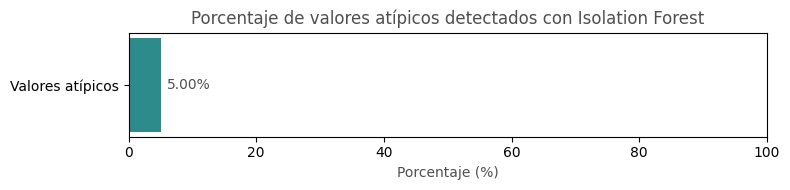

In [24]:
plt.figure(figsize=(8, 2))
plt.barh(
    ["Valores atípicos"],
    [percentage_outliers],
    color=PALETTE_EJ1["secondary"]
)
plt.xlim(0, 100)
plt.xlabel("Porcentaje (%)", color=PALETTE_EJ1["accent"])
plt.title(
    "Porcentaje de valores atípicos detectados con Isolation Forest",
    color=PALETTE_EJ1["accent"]
)
plt.text(
    percentage_outliers + 1,
    0,
    f"{percentage_outliers:.2f}%",
    va="center",
    color=PALETTE_EJ1["accent"]
)

plt.tight_layout()
plt.show()


Se realizó un análisis exploratorio de valores atípicos con Isolation Forest. Dado que las variables corresponden a escalas ordinales, los valores detectados se utilizaran únicamente con fines descriptivos y no se ve necesario elimanarlos del conjunto de datos.

Matriz de Correlación

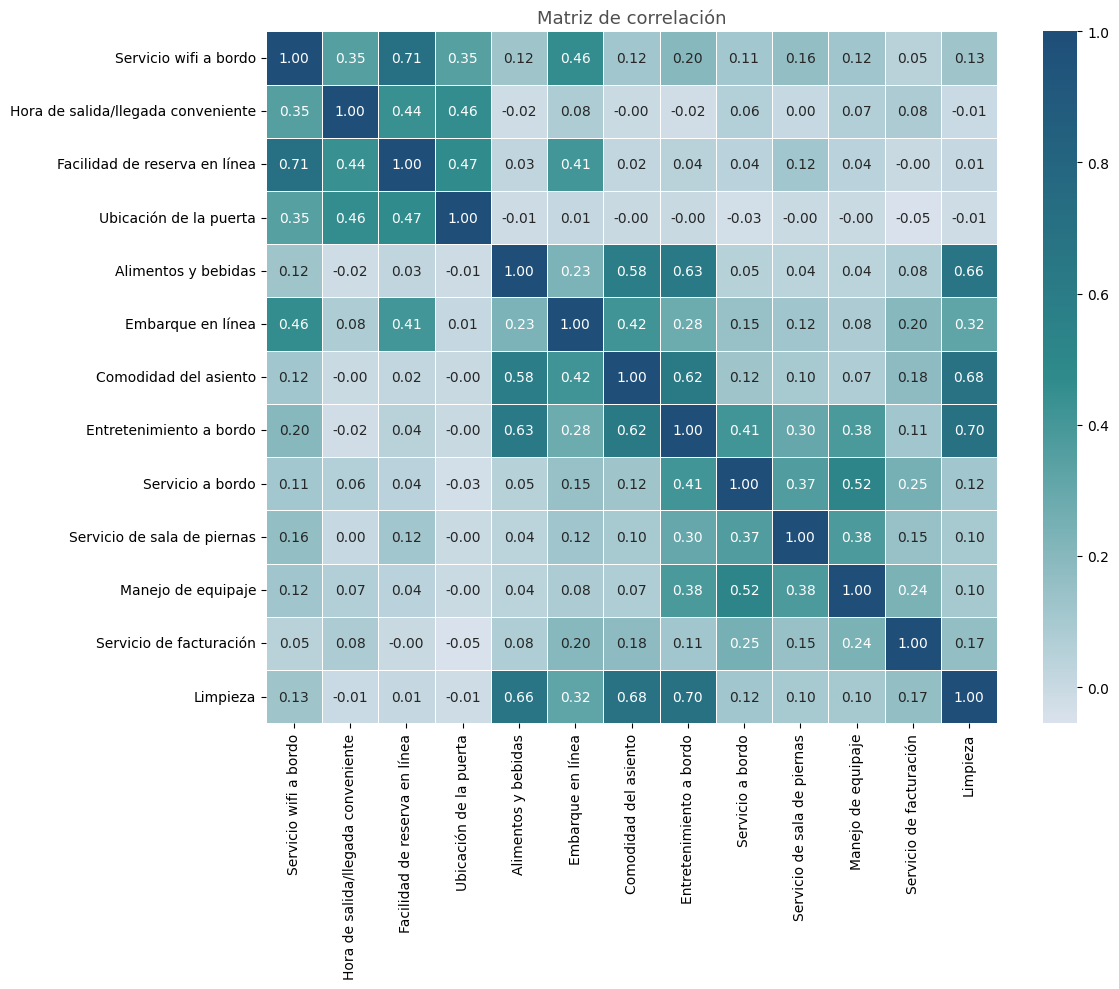

In [25]:
df_tmp = df_ej1.drop(columns=["Id"])
df_ej1_encoded = pd.get_dummies(df_tmp, drop_first=True)
corr = df_ej1_encoded.corr()

cmap_ej1 = LinearSegmentedColormap.from_list(
    "ej1",
    [PALETTE_EJ1["light"], PALETTE_EJ1["secondary"], PALETTE_EJ1["primary"]]
)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap=cmap_ej1,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de correlación", color=PALETTE_EJ1["accent"], fontsize=13)
plt.tight_layout()
plt.show()

La matriz de correlación muestra asociaciones positivas moderadas entre diversas variables de satisfacción. Destacan correlaciones relativamente altas entre aspectos relacionados con la experiencia a bordo, como comodidad del asiento, entretenimiento a bordo, limpieza y alimentos y bebidas, lo que sugiere la posible existencia de una dimensión latente asociada al confort y la experiencia durante el vuelo. Asimismo, variables relacionadas con procesos y servicios presentan correlaciones más bajas entre sí, indicando que podrían representar dimensiones distintas.

### Analisis Factorial

In [28]:
# Seleccionamos nuestras variables
X_af = df_ej1[var_num].copy()
X_af.head()

,Servicio de sala de piernas,Hora de salida/llegada conveniente,Embarque en línea,Ubicación de la puerta,Comodidad del asiento,Limpieza,Facilidad de reserva en línea,Entretenimiento a bordo,Servicio de facturación,Manejo de equipaje,Servicio wifi a bordo,Alimentos y bebidas,Servicio a bordo
0,5,4,4,4,3,5,3,5,2,5,5,3,5
1,4,1,4,1,5,5,3,4,3,4,1,5,4
2,1,0,2,4,2,2,2,2,2,3,2,2,4
3,1,0,4,2,4,4,0,1,3,1,0,3,1
4,2,3,1,3,2,4,4,2,4,2,2,4,2


Escalamiento de nuestras variables

In [27]:
scaler = StandardScaler()
X_af_std = scaler.fit_transform(X_af)

X_af_std = pd.DataFrame(X_af_std, columns=var_num)
X_af_std.head()


,Servicio de sala de piernas,Hora de salida/llegada conveniente,Embarque en línea,Ubicación de la puerta,Comodidad del asiento,Limpieza,Facilidad de reserva en línea,Entretenimiento a bordo,Servicio de facturación,Manejo de equipaje,Servicio wifi a bordo,Alimentos y bebidas,Servicio a bordo
0,1.250974,0.621641,0.544692,0.797831,-0.340303,1.298998,0.172143,1.227138,-1.035348,1.161716,1.703853,-0.161739,1.259170
1,0.492730,-1.334871,0.544692,-1.542065,1.174774,1.298998,0.172143,0.479907,-0.247517,0.311739,-1.291598,1.340348,0.479178
2,-1.782001,-1.987042,-0.930768,0.797831,-1.097842,-0.974927,-0.535609,-1.014556,-1.035348,-0.538238,-0.542735,-0.912783,0.479178
3,-1.782001,-1.987042,0.544692,-0.762100,0.417235,0.541023,-1.951114,-1.761787,-0.247517,-2.238193,-2.040460,-0.161739,-1.860800
4,-1.023758,-0.030530,-1.668498,0.017866,-1.097842,0.541023,0.879895,-1.014556,0.540315,-1.388216,-0.542735,0.589304,-1.080807


Prueba de estadistica

In [40]:
# Prueba KMO
kmo_all, kmo_model = calculate_kmo(X_af_std)
# Prueba de esfericidad de Bartlett
chi_square, p_value = calculate_bartlett_sphericity(X_af_std)

print(f"KMO Test Statisitc: {kmo_model:.4f}")
print(f"Valor de Chi2: {chi_square:.4f}")
print(f"P - value: {p_value:.5f}")

KMO Test Statisitc: 0.7605
Valor de Chi2: 133444.6006
P - value: 0.00000


El valor del estadístico KMO obtenido es *0.7605*, lo cual indica una adecuación muestral adecuada para la aplicación de Análisis Factorial. Por otro lado, la prueba de esfericidad de Bartlett resulta estadísticamente significativa *(p < 0.05)*, lo que confirma la existencia de correlaciones suficientes entre las variables.

Determinación de numeros factoriales

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



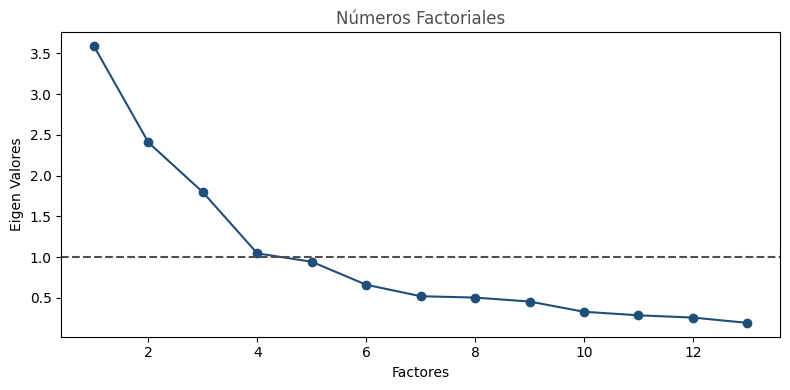

In [43]:
fa_test = FactorAnalyzer(rotation=None)
fa_test.fit(X_af_std)

eigenvalues, _ = fa_test.get_eigenvalues()

plt.figure(figsize=(8,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o',
         color=PALETTE_EJ1["primary"])
plt.axhline(1, linestyle='--', color=PALETTE_EJ1["accent"])
plt.xlabel("Factores")
plt.ylabel("Eigen Valores")
plt.title("Números Factoriales", color=PALETTE_EJ1["accent"])
plt.tight_layout()
plt.show()


Se muestra que los primeros cuatro factores presentan valores propios mayores o cercanos a 1. A partir del cuarto factor se observa una disminución pronunciada en los eigen valores, seguida de una pendiente más estable, lo que sugiere que los factores adicionales aportan poca varianza explicativa. Por lo tanto, se considera adecuado retener cuatro factores para el análisis factorial.

In [44]:
n_factors = sum(eigenvalues > 1)
print("Número de factores sugeridos:", n_factors)


Número de factores sugeridos: 4


In [45]:
fa = FactorAnalyzer(
    n_factors=n_factors,
    rotation="varimax"
)

fa.fit(X_af_std)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



FactorAnalyzer(n_factors=np.int64(4), rotation='varimax', rotation_kwargs={})

Cargas

In [46]:
loadings = pd.DataFrame(
    fa.loadings_,
    index=var_num,
    columns=[f"Factor {i+1}" for i in range(n_factors)]
)

loadings


,Factor 1,Factor 2,Factor 3,Factor 4
Servicio de sala de piernas,0.055927,0.054570,0.508387,0.069544
Hora de salida/llegada conveniente,-0.023239,0.589659,0.042458,-0.002448
Embarque en línea,0.274192,0.126197,0.134683,0.767201
Ubicación de la puerta,0.013904,0.692989,-0.059144,-0.119747
Comodidad del asiento,0.756433,-0.028556,0.084885,0.216712
Limpieza,0.850699,-0.009784,0.088931,0.106887
Facilidad de reserva en línea,-0.033181,0.775863,0.038937,0.424132
Entretenimiento a bordo,0.775178,0.042450,0.462248,0.013913
Servicio de facturación,0.098746,-0.037604,0.289719,0.143322
Manejo de equipaje,0.046118,0.047976,0.739283,-0.044047


Los resultados muestran cuatro factores bien definidos asociados a la experiencia a bordo, la conveniencia del viaje, la gestión operativa y el proceso de embarque, lo que evidencia una estructura latente coherente en las respuestas de satisfacción.



*   Factor 1: Confort y experiencia a bordo

*   Factor 2: Conveniencia y servicios digitales

*   Factor 3: Gestión operativa del viaje

*   Factor 4: Proceso de embarque



Varianza Explicada

In [48]:
variance = fa.get_factor_variance()

var_df = pd.DataFrame({
    "Varianza": variance[0],
    "Proportional Var": variance[1],
    "Cumulative Var": variance[2]
}, index=[f"Factor {i+1}" for i in range(n_factors)])

var_df


,Varianza,Proportional Var,Cumulative Var
Factor 1,2.601774,0.200136,0.200136
Factor 2,1.847524,0.142117,0.342254
Factor 3,1.688002,0.129846,0.472100
Factor 4,1.069888,0.082299,0.554399


Los cuatro factores explican alrededor del 55% de la varianza total, siendo el primer factor el de mayor contribución.

Scores


In [49]:
factor_scores = fa.transform(X_af_std)

factor_scores = pd.DataFrame(
    factor_scores,
    columns=[f"Factor {i+1}" for i in range(n_factors)]
)

factor_scores.head()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,Factor 1,Factor 2,Factor 3,Factor 4
0,0.531723,0.692741,1.263704,0.052087
1,0.987272,-0.969847,0.108793,0.594362
2,-0.988232,-0.310095,-0.504004,-0.643446
3,0.101744,-2.086964,-2.379088,0.525274
4,-0.027915,0.633082,-1.462066,-0.830930


Los scores factoriales constituyen una nueva representación de las observaciones en el espacio de cuatro factores, sintetizando la información original del conjunto de datos.

*********************************

### Ejercicio 2